# 单变量线性回归

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 读取数据

In [2]:
path = '/content/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head() # 取前5行

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


## 绘制图像

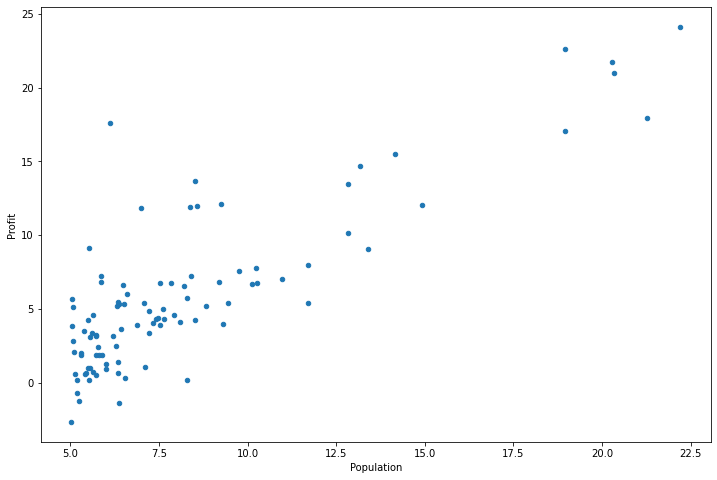

In [4]:
# 直接用data画图
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12, 8))
plt.show()

## 代价函数


In [5]:
def computeCost(X, y, theta):
  # 直接进行矩阵运算
  # X - m*(n+1)矩阵
  # theta.T - 1*(n+1)矩阵
  # y - m*1矩阵
  inner = np.power(((X * theta.T) - y), 2) #power平方
  return np.sum(inner) / (2 * len(X))

让我们在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度。

In [6]:
# data.insert(列号, header名, 值)
data.insert(0, 'Ones', 1)
data

,Ones,Population,Profit
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


变量初始化

In [7]:
cols = data.shape[1]
# pandas数据采用iloc进行切片
X = data.iloc[:, 0:cols-1] # 去掉最后一列
y = data.iloc[:, cols-1:cols] # 取最后一列
X, y

(    Ones  Population
 0      1      6.1101
 1      1      5.5277
 2      1      8.5186
 3      1      7.0032
 4      1      5.8598
 ..   ...         ...
 92     1      5.8707
 93     1      5.3054
 94     1      8.2934
 95     1     13.3940
 96     1      5.4369
 
 [97 rows x 2 columns],       Profit
 0   17.59200
 1    9.13020
 2   13.66200
 3   11.85400
 4    6.82330
 ..       ...
 92   7.20290
 93   1.98690
 94   0.14454
 95   9.05510
 96   0.61705
 
 [97 rows x 1 columns])

代价函数是应该是numpy矩阵，所以我们需要转换X和Y，然后才能使用它们。 我们还需要初始化theta。

In [8]:
# Pandas DataFrame.values属性返回给定DataFrame的Numpy表示形式。
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.zeros(2))

In [9]:
theta

matrix([[0., 0.]])

In [10]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

计算代价函数

In [11]:
computeCost(X, y, theta)

32.072733877455676

## batch gradient decent

In [12]:
# print(len(X))
def gradientDescent(X, y, theta, alpha, iters):
  temp = np.matrix(np.zeros(theta.shape))
  # ravel()方法将数组维度拉成一维数组
  parameters = int(theta.ravel().shape[1])
  cost = np.zeros(iters) # 用于记录代价函数值

  for i in range(iters):
    # error - m*1矩阵
    error = (X * theta.T) - y
    
    for j in range(parameters):
      # (h(x)-y) * x
      # np.multiply - 对应元素相乘，如果shape不同的话，会将小规格的矩阵延展成与另一矩阵一样大小，再求两者内积
      term = np.multiply(error, X[:, j])
      # X为matrix则len(X)输出行数
      temp[0, j] = theta[0, j] - ((alpha / len(X))) * np.sum(term)

      theta = temp
      cost[i] = computeCost(X, y, theta)

  return theta, cost

In [13]:
alpha = 0.01
iters = 1000

In [14]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.25093465,  1.12825185]])

In [15]:
computeCost(X, y, g)

4.514827991660197

## 绘制线性模型以及数据

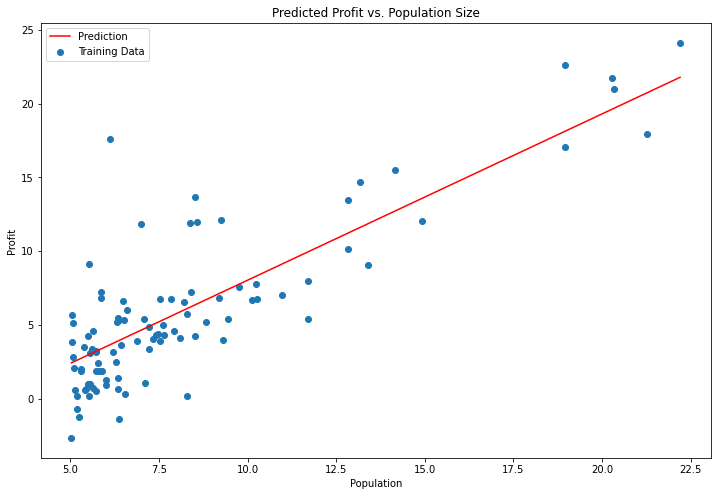

In [20]:
# np.linspace(start, stop, num) - 在指定的间隔内返回均匀间隔的数字。返回num均匀分布的样本，在[start, stop]。
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

# ax.plot和plt.plot()的区别：https://www.cnblogs.com/cgmcoding/p/13384221.html
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Training Data')
# 在图上标明一个图例，用于说明每条曲线的文字显示
#  legend（）有一个loc参数，用于控制图例的位置。 比如 plot.legend(loc=2) , 这个位置就是4象项中的第二象项，也就是左上角。 loc可以为1,2,3,4 这四个数字。
ax.legend(loc=2) 
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

## 绘制代价曲线

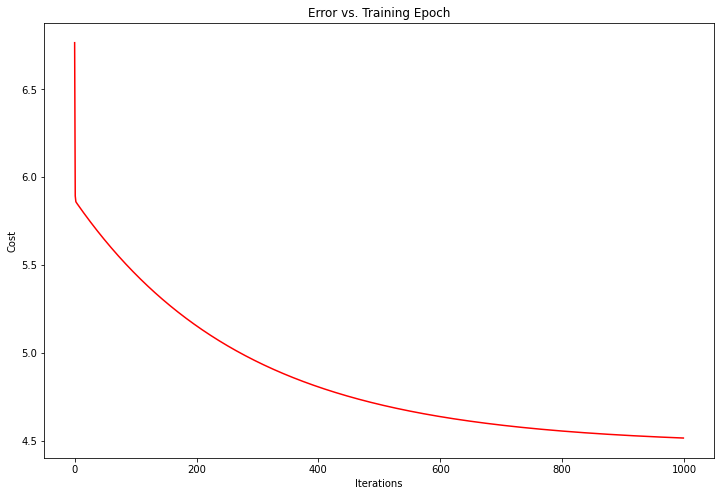

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

# 多变量线性回归

## 读取数据

In [22]:
path = '/content/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## 特征归一化

In [23]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


现在我们重复第1部分的预处理步骤，并对新数据集运行线性回归程序。

In [24]:
data2.insert(0, 'Ones', 1)
cols = data2.shape[1]
X2 = data2.iloc[:, 0:cols-1]
y2 = data2.iloc[:, cols-1:cols]

X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.zeros(cols-1))

g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

computeCost(X2, y2, g2)

0.13070336960771892

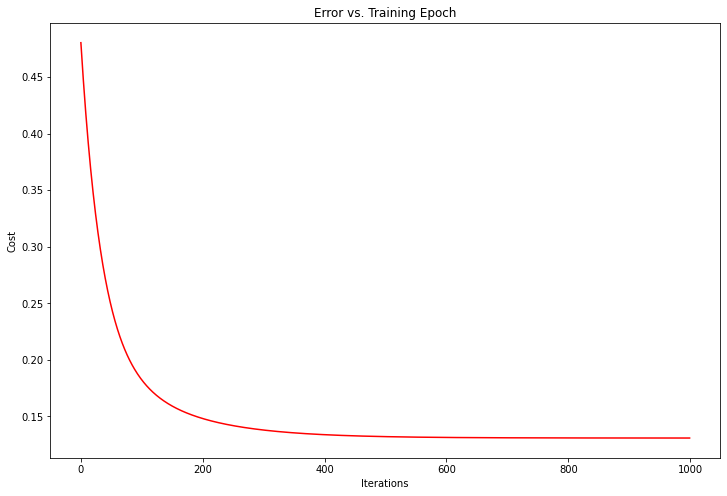

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

我们也可以使用scikit-learn的线性回归函数，而不是从头开始实现这些算法。 我们将scikit-learn的线性回归算法应用于第1部分的数据，并看看它的表现。

In [26]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


LinearRegression()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


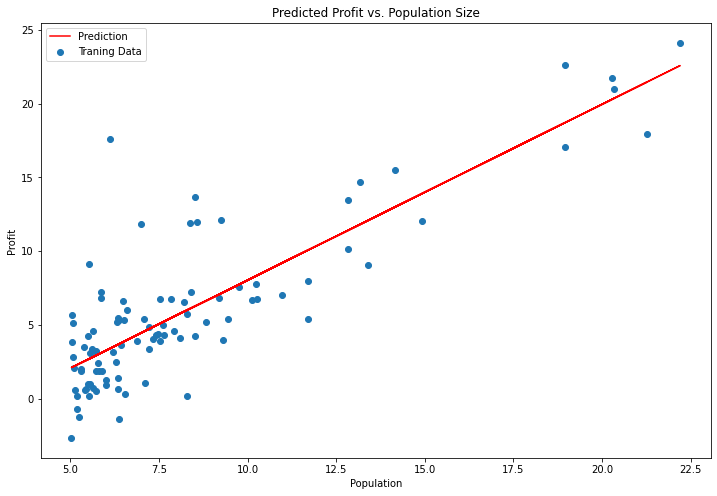

In [42]:
x = np.array(X[:, 1].A1) # .A1将矩阵拉直为一维数组
f = model.predict(X).flatten() # 将多维数组拉成一维数组

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

# 正规方程

In [43]:
def normalEqn(X, y):
  theta = np.linalg.inv(X.T@X)@X.T@y
  return theta

In [45]:
final_theta2 = normalEqn(X, y)
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])